In [7]:
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [8]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
  1/235 [..............................] - ETA: 0s - loss: 0.6928WARNING:tensorflow:From C:\ProgramData\anaconda3\envs\tensorflowsessions\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
235/235 [==============================] - 3s 14ms/step - loss: 0.2570 - val_loss: 0.2048
Epoch 2/100
235/235 [==============================] - 3s 15ms/step - loss: 0.1855 - val_loss: 0.1748
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1713 - val_loss: 0.1675
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1654 - val_loss: 0.1629
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1613 - val_loss: 0.1597
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1587 - val_loss: 0.1576
Epoch 7/100
235/2

In [13]:
encoded_imgs

NameError: name 'encoded_imgs' is not defined

In [15]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

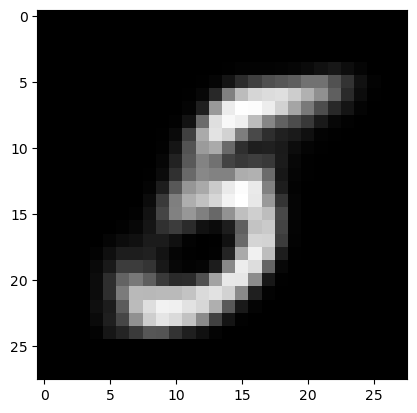

In [16]:
plt.imshow(noise_preds[1].reshape(28,28))

In [17]:
np.max(encoded_imgs)

76.44571

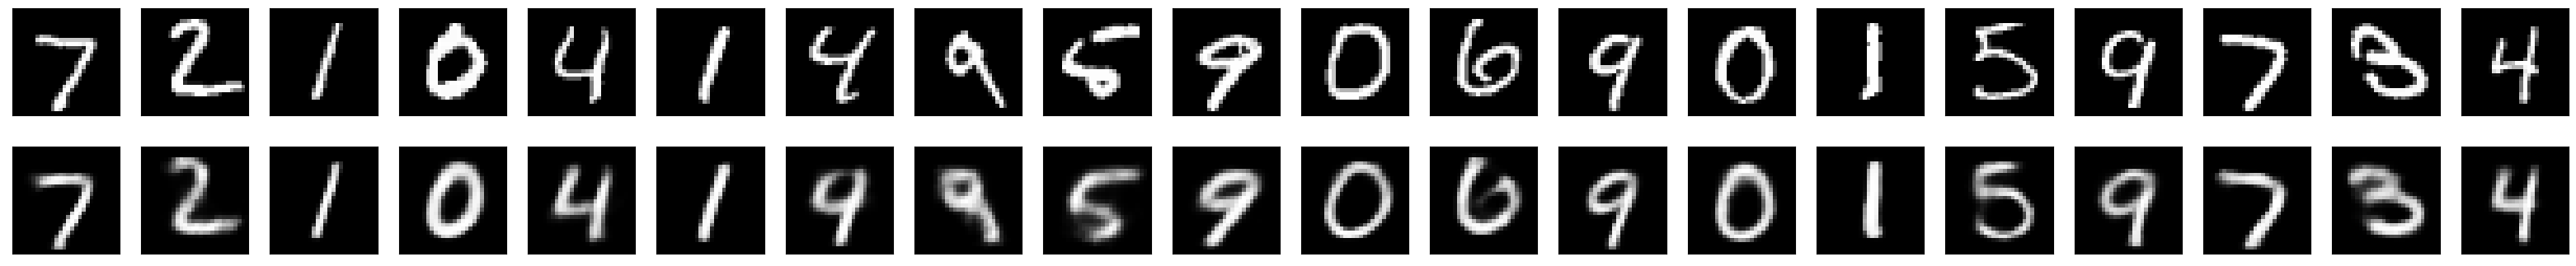

In [14]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
encoded_imgs

array([[40.976826 ,  8.136488 , 13.2828455, 24.69802  ],
       [10.06474  , 11.671144 ,  7.5990458, 24.359596 ],
       [51.512817 , 45.825855 , 21.108366 , 38.46664  ],
       ...,
       [24.570618 , 12.747859 , 13.119001 ,  7.321924 ],
       [ 8.627714 , 15.594738 ,  4.320277 ,  3.197141 ],
       [14.673101 , 20.540499 , 22.940329 ,  6.8989034]], dtype=float32)

In [19]:
%matplotlib inline

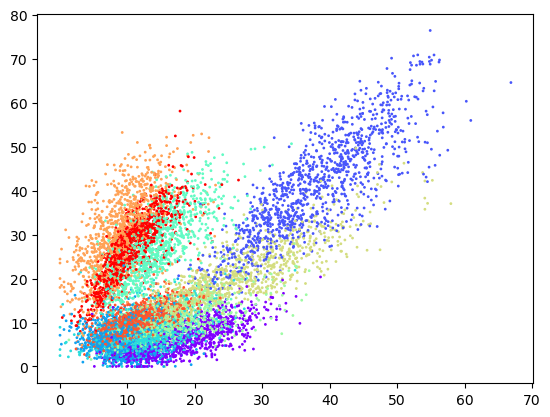

In [20]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
plt.show()

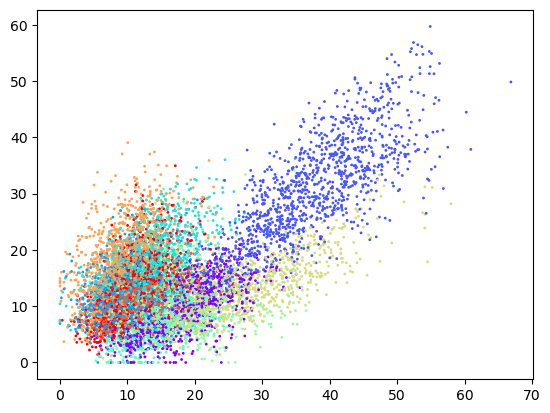

In [21]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
plt.show()

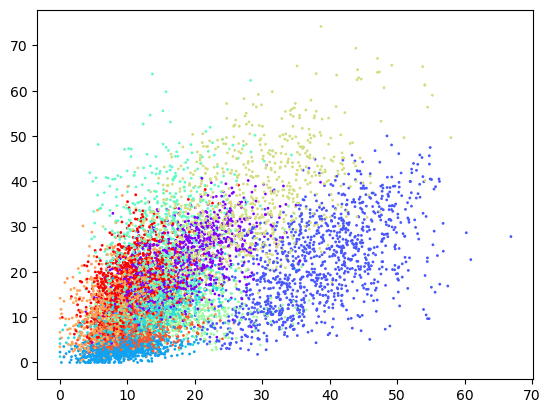

In [22]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
plt.show()

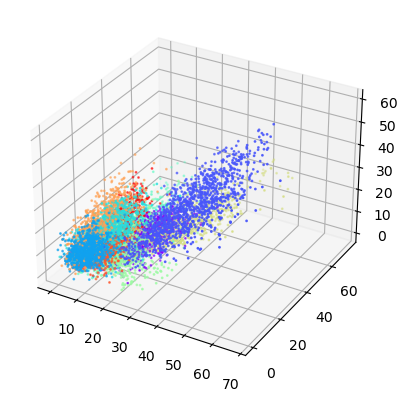

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

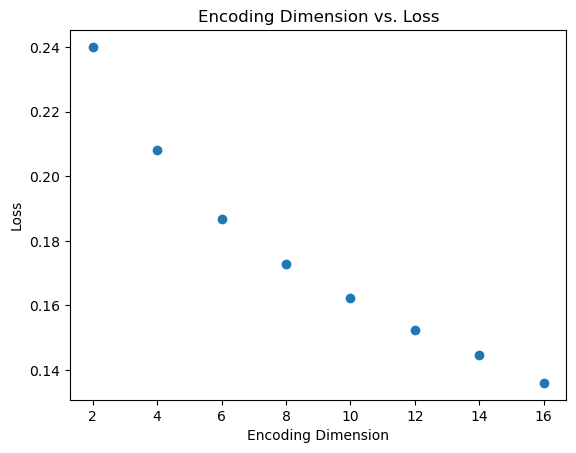

In [24]:
# Part 1
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
def autoencoder_model(encoding_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(encoding_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Train the autoencoder model for each encoding dimension and save the loss
losses = []
encoding_dims = range(2, 18, 2)
for dim in encoding_dims:
    autoencoder = autoencoder_model(dim)
    history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=0)
    losses.append(history.history['loss'][-1])

# Plot the encoding dimensions vs. loss on a scatter plot
plt.scatter(encoding_dims, losses)
plt.title('Encoding Dimension vs. Loss')
plt.xlabel('Encoding Dimension')
plt.ylabel('Loss')
plt.show()

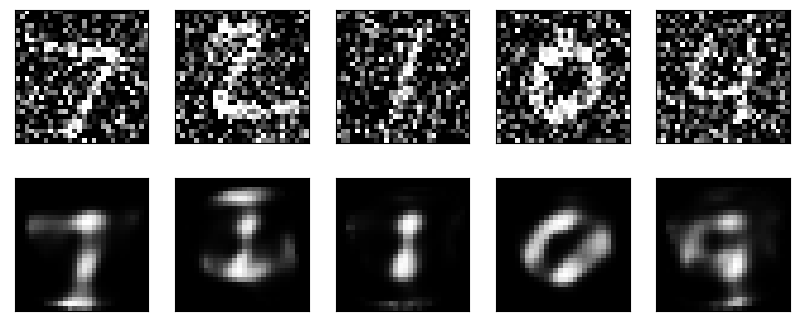

In [25]:
# Part 2
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model with encoding_dim=8
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=0)

# Apply noise to the input of the trained autoencoder and generate output images without noise
noise_factor = 0.5
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
decoded_imgs = autoencoder.predict(x_test_noisy)

# Print a few noisy input images along with their corresponding output images
n = 5  # Number of images to display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images (output without noise)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()